In [ ]:
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.10.0


In [ ]:
import pandas as pd
import io
import requests

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv"

response = requests.get(URL)
text = io.BytesIO(response.content)

df_can = pd.read_csv(text)
print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [ ]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [ ]:
print(df_can.shape)

(195, 39)


In [ ]:
df_can.set_index('Country', inplace=True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [ ]:
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


In [ ]:
years=list(map(str,range(1980,2014)))
#years.np.arange(1980,2014)

In [ ]:
df_line=df_can[years]
total_immigrants=df_line.sum()
total_immigrants

,0
1980,99137
1981,110563
1982,104271
1983,75550
1984,73417
1985,69978
1986,86048
1987,134771
1988,139306
1989,164432


Text(0, 0.5, 'Total Immigrants')

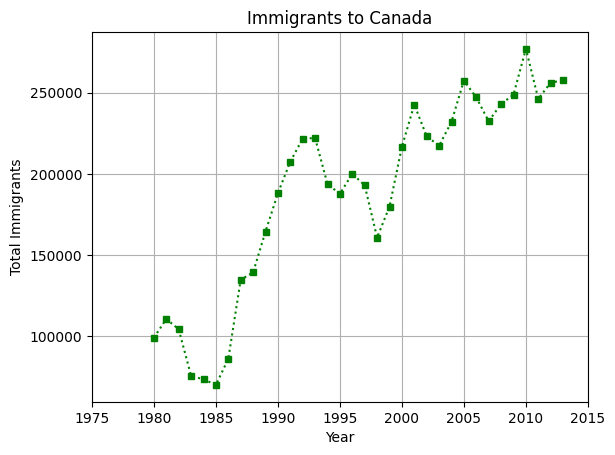

In [ ]:
fig, ax=plt.subplots()
total_immigrants.index = total_immigrants.index.map(int)
ax.plot(total_immigrants, marker='s', markersize = 5, color='green', linestyle="dotted")
ax.set_title('Immigrants to Canada')
plt.xlim(1975,2015)
plt.grid(True)
ax.set_xlabel('Year')
ax.set_ylabel('Total Immigrants')


## New Case Study of Haiti

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and aout three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. We can quickly visualize this effort using a Line plot

In [ ]:
df_can.reset_index(inplace=True)  # Resets index, bringing 'Country' back as a column
haiti = df_can.loc[df_can['Country'] == 'Haiti']
haiti = haiti[years].transpose()
haiti.index = haiti.index.map(int)
haiti = haiti[haiti.columns[1]]
fig, ax = plt.subplots()
ax.plot(haiti)
ax.set_title('Immigrants from Haiti between 1980-2013')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Immigrants')
plt.grid(True)
ax.set_facecolor('lightgray')
ax.set_xticks(np.arange(1980, 2015, 10))
plt.legend(["immigrants"])
ax.annotate('2010 EarthQuake', xy=(2000,6000))
plt.show()



ValueError: cannot insert level_0, already exists

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))

# Convert 'years' to numerical values
years_num = [int(year) for year in years]

ax.scatter(years_num, total_immigrants, marker='o', s=20, color='darkblue')
plt.title('Total Immigrants to Canada')
plt.xlabel('Year')
plt.ylabel('Total Immigrants')
plt.grid(True)
ax.legend(["Immigrants"], loc='upper center')
plt.show()

In [ ]:
df_can.sort_values(['Total'], ascending=True, axis=0, inplace=True)

    # get the top 5 entries with head function
df_least5 = df_can.head()

    #resetting the index back to original way
df_least5_bar=df_least5.reset_index()

    #Creating alist of names of the top 5 countries
label=list(df_least5_bar.Country)
    #label

fig, ax = plt.subplots(figsize=(10, 4))

ax.bar(label, df_least5_bar['Total'],label=label)
ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

plt.show()

In [ ]:
df_bar_5.head()